In [869]:
import pandas as pd
import numpy as np
import plotly
plotly.tools.set_credentials_file(username='sherry9788', api_key='Cw40WD6lRwalI8wtPd72')
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [870]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.shape

(16719, 16)

In [871]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [872]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Variables

In [873]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [874]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [875]:
df2 = df.copy().dropna()
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [876]:
df2.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Name

In [877]:
df.Name.nunique()

11562

Not every one is unique, check to see what the duplicates look like

In [878]:
df[df.Name==df[df.Name.duplicated()].Name.values[0]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


In [879]:
df2.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

These are the games that have versions across multiple platforms.

## Platform

In [880]:
data = [go.Histogram(x=df2.Platform)]
py.iplot(data, filename='Platform Frequency')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sherry9788/0 or inside your plot.ly account where it is named 'Platform Frequency'


In [881]:
platform = df2.Platform.value_counts()
print(platform)

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64


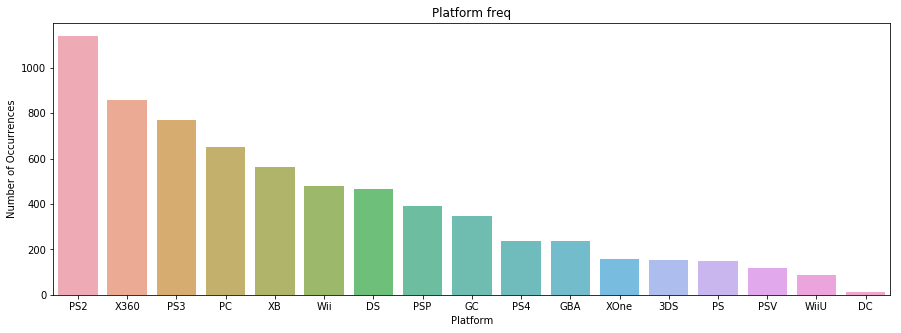

In [882]:
plt.figure(figsize=(15,5))
sns.barplot(platform.index, platform.values, alpha=0.8)
plt.title('Platform freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Platform')
plt.show()

## Genre

In [883]:
df2.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [884]:
genre = df2.Genre.value_counts()
print(genre)

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64


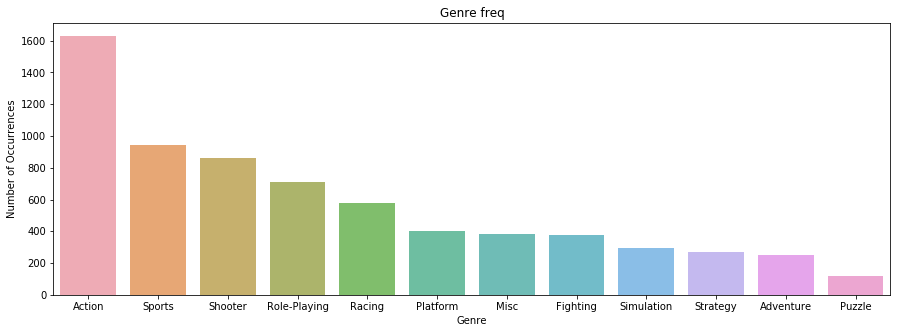

In [885]:
plt.figure(figsize=(15,5))
sns.barplot(genre.index, genre.values, alpha=0.8)
plt.title('Genre freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Genre')
plt.show()

## Publisher

In [886]:
df2.Publisher.nunique()

262

In [887]:
df2.Publisher.value_counts().iloc[:30]

Electronic Arts                           944
Ubisoft                                   496
Activision                                492
Sony Computer Entertainment               316
THQ                                       307
Nintendo                                  291
Sega                                      284
Take-Two Interactive                      273
Konami Digital Entertainment              244
Namco Bandai Games                        239
Capcom                                    197
Atari                                     176
Microsoft Game Studios                    141
Tecmo Koei                                137
Square Enix                               134
Warner Bros. Interactive Entertainment    130
Eidos Interactive                         123
Vivendi Games                             113
Codemasters                               111
Midway Games                              103
505 Games                                  80
Deep Silver                       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

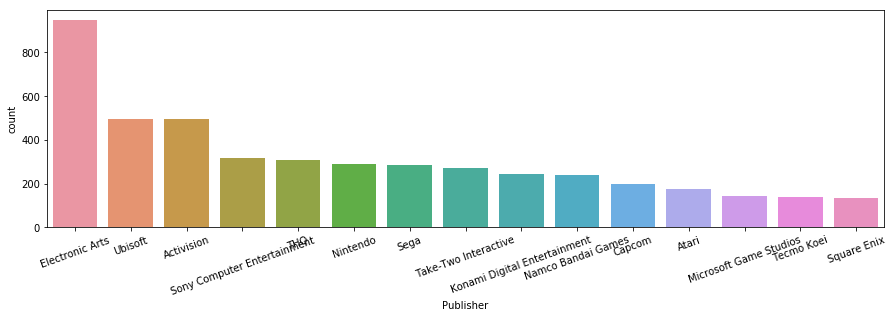

In [888]:
plt.figure(figsize=(15, 4))
sns.countplot(df2.Publisher, order=df2.Publisher.value_counts().iloc[:15].index)
plt.xticks(rotation=20)

## Year of Release

In [889]:
np.sort(df2.Year_of_Release.unique())

array([1985., 1988., 1992., 1994., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016.])

In [890]:
df2.Year_of_Release = df2.Year_of_Release.astype(int)

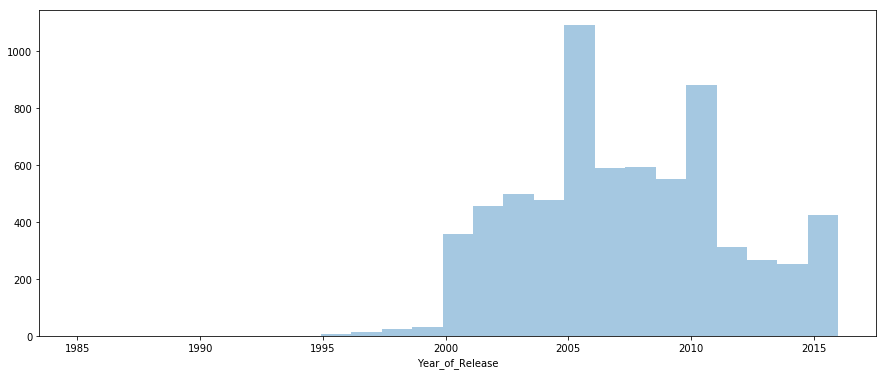

In [891]:
plt.figure(figsize=(15, 6))
sns.distplot(df2.Year_of_Release, kde = False, bins=df2.Year_of_Release.nunique())

## Critic_Score, Critic_Count, User_Score, User_Count

In [892]:
df2.User_Score.unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7',
       '5.4', '4', '9.3', '6.2', '4.2', '6', '4.9', '3.7', '4.1', '5.8',
       '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2',
       '3.3', '4.5', '5.1', '3.5', '2.5', '1.9', '2.2', '2', '9.5', '4.7',
       '2.1', '3.6', '1.8', '3.8', '3', '9.6', '2.8', '1.7', '2.7', '2.4',
       '1.5', '1.2', '2.3', '0.5', '0.6', '0.9', '1', '1.4', '1.3', '0.7'],
      dtype=object)

In [893]:
df2.User_Score = df2.User_Score.astype(float)
print(df2.User_Score.max())
print(df2.User_Score.min())

9.6
0.5


In [894]:
df2.User_Count = df2.User_Count.astype(int)
print(df2.User_Count.max())
print(df2.User_Count.min())

10665
4


In [895]:
df2.Critic_Score = df2.Critic_Score.astype(float)
print(df2.Critic_Score.max())
print(df2.Critic_Score.min())

98.0
13.0


In [896]:
df2.Critic_Count = df2.Critic_Count.astype(int)
print(df2.Critic_Count.max())
print(df2.Critic_Count.min())

113
3


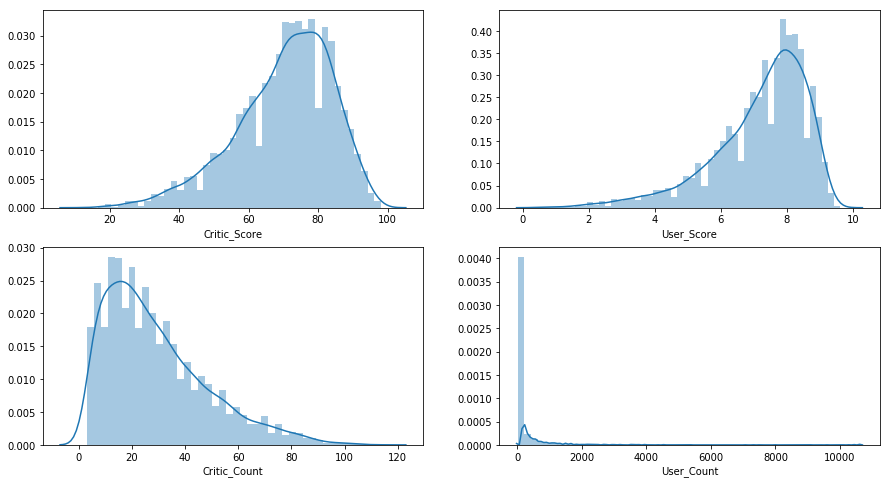

In [897]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.distplot(df2.Critic_Score)

plt.subplot(2,2,2)
sns.distplot(df2.User_Score)

plt.subplot(2,2,3)
sns.distplot(df2.Critic_Count)

plt.subplot(2,2,4)
sns.distplot(df2.User_Count)

## Developer

In [898]:
df2.Developer.unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North', ...,
       'Big Red Software', 'Fluid Studios', 'Atomic Games'], dtype=object)

In [899]:
df2.Developer.nunique()

1289

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

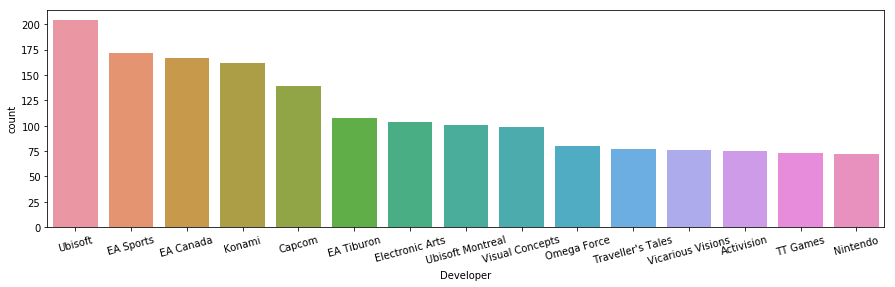

In [900]:
plt.figure(figsize=(15, 4))
sns.countplot(df.Developer, order=df.Developer.value_counts().iloc[:15].index)
plt.xticks(rotation=15)

In [901]:
sony_studio = df2.loc[(df2.Publisher.isna()==False) & (df2.Publisher.str.contains('Sony')), 'Developer'].value_counts()
print(sony_studio[np.arange(10)])

SCEA San Diego Studios    25
SCE Japan Studio          17
SCEA                      14
989 Sports                12
SCEE London Studio        12
Namco                     12
Naughty Dog               10
Zipper Interactive         8
SCEE                       7
Polyphony Digital          7
Name: Developer, dtype: int64


In [902]:
len(sony_studio)

124

## Rating

In [903]:
np.sort(df2.Rating.unique())

array(['AO', 'E', 'E10+', 'K-A', 'M', 'RP', 'T'], dtype=object)

In [904]:
rating = df2.Rating.value_counts()
print(rating)

T       2377
E       2082
M       1433
E10+     930
K-A        1
RP         1
AO         1
Name: Rating, dtype: int64


In [905]:
df2.loc[df2.Rating=='K-A', 'Rating'] = 'E' 

In [906]:
rating = df2.Rating.value_counts()
print(rating)

T       2377
E       2083
M       1433
E10+     930
RP         1
AO         1
Name: Rating, dtype: int64


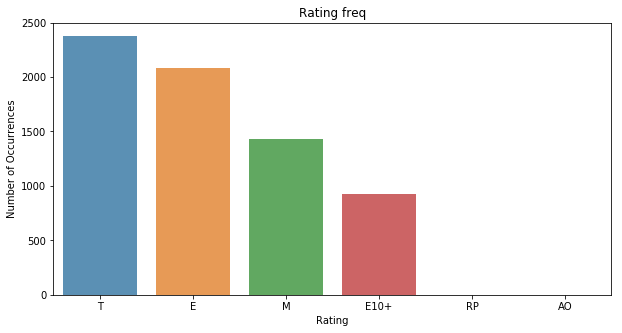

In [907]:
plt.figure(figsize=(10,5))
sns.barplot(rating.index, rating.values, alpha=0.8)
plt.title('Rating freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Rating')
plt.show()

## NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

Game sales in North America (in millions of units)

In [908]:
((df.Global_Sales>=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*0.99) 
& (df.Global_Sales<=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*1.01)).head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

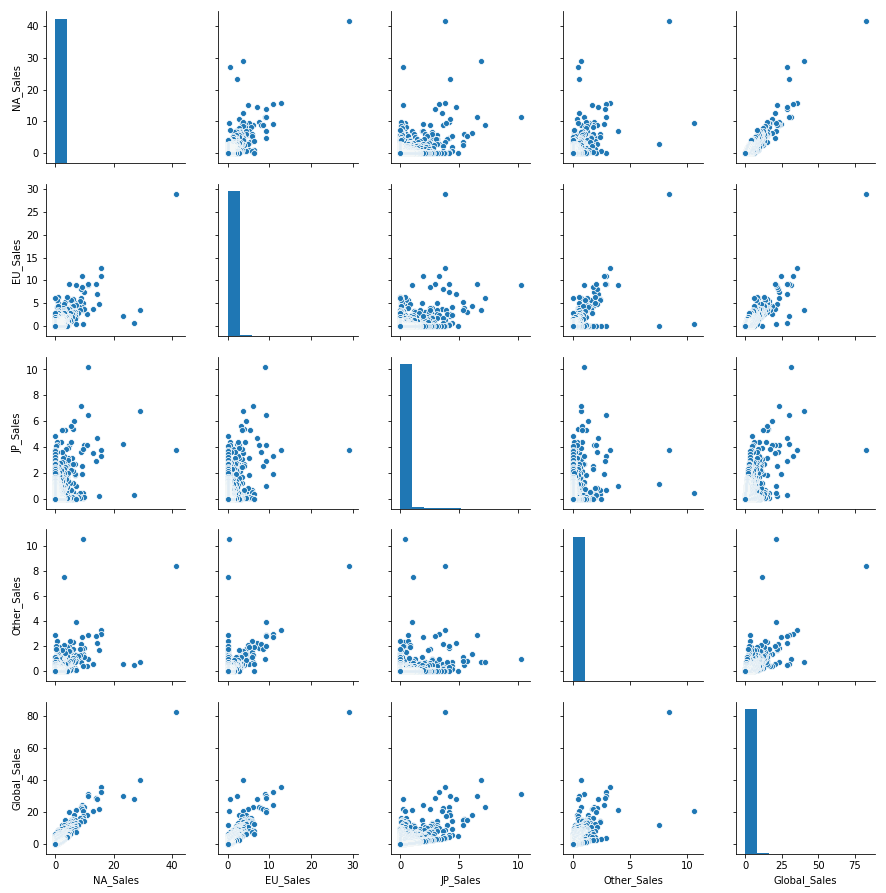

In [909]:
sns.pairplot(df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])

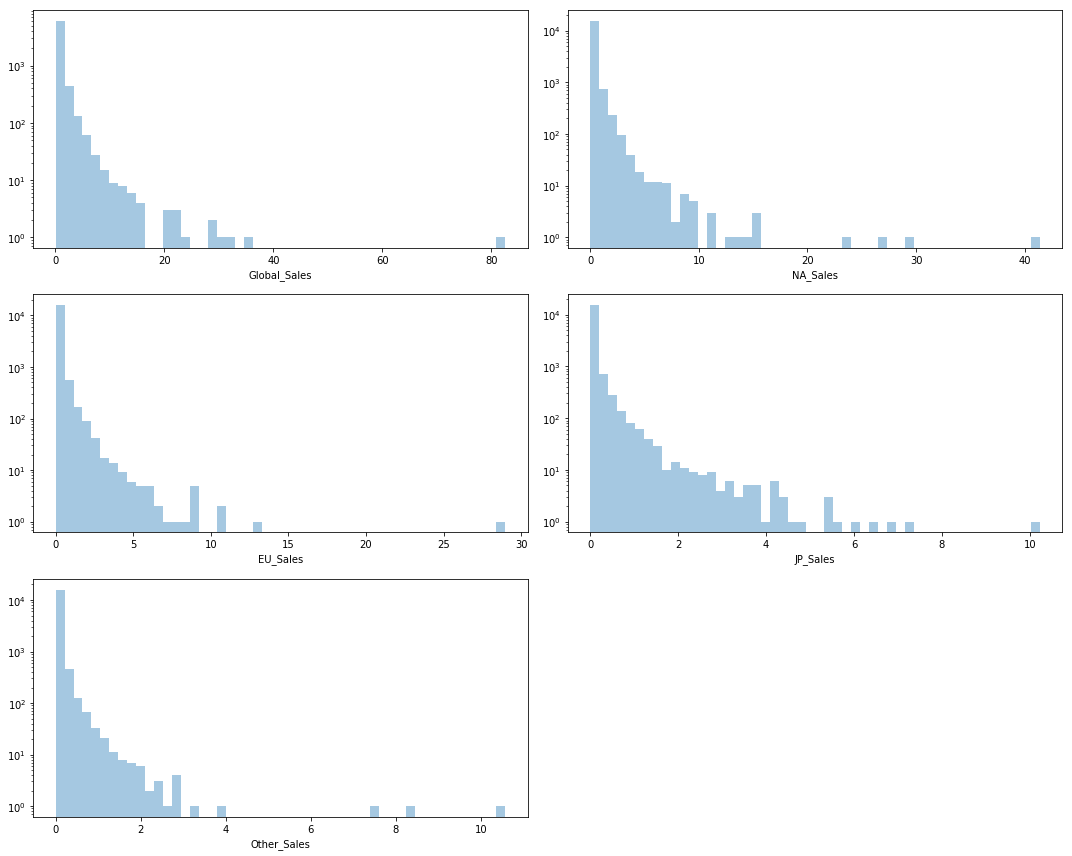

In [910]:
plt.figure(figsize=(15, 12))
plt.subplot(3,2,1)
sns.distplot(df2.Global_Sales, kde=False)
plt.yscale('log')

plt.subplot(3,2,2)
sns.distplot(df.NA_Sales, kde=False)
plt.yscale('log')

plt.subplot(3,2,3)
sns.distplot(df.EU_Sales, kde=False)
plt.yscale('log')

plt.subplot(3,2,4)
sns.distplot(df.JP_Sales, kde=False)
plt.yscale('log')

plt.subplot(3,2,5)
sns.distplot(df.Other_Sales, kde=False)
plt.yscale('log')
plt.tight_layout()

# Modeling

# Predicting video game global sales

## Goal
In this section, we are trying to build a statistical model that can predict video games global sales based on other features from this dataset. 

## Metric
We will evaluate our model based on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales. (Taking logs means that errors in predicting large sales and small sales will affect the result equally.)

## Preparations

### Importing packages

In [911]:
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV

In [912]:
df2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E


# Target Variable

Global_Sales is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 0.78 and sigma = 1.96



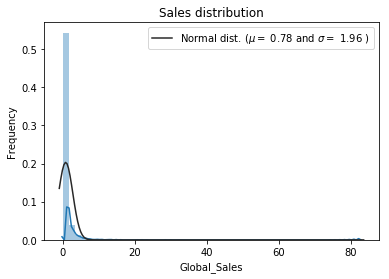

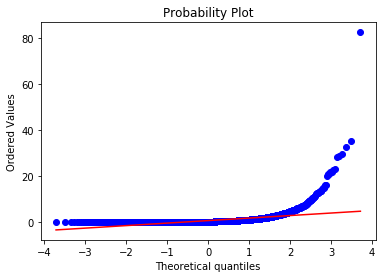

In [913]:
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df2['Global_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df2['Global_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df2['Global_Sales'], plot=plt)
plt.show()

There is an outlier: there is one observation that has a sales of 80 million units -- Wii Sports by Nintendo. This observation really destroyed the distribution of the sales.

In [914]:
df2.loc[df2.Global_Sales>80,:]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E


Thus we decided to ignore that observation.

In [915]:
df2=df2.drop(0)

# Log-transformation of the target variable

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

Also, since we have chosen to evaluate our model based on the RMSE of the logarithm of the sales, it is natural that we take the logarithm of the sales and fit our model on the transformed values.


 mu = 0.42 and sigma = 0.45



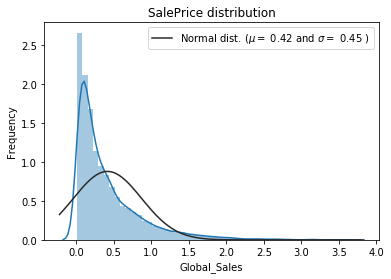

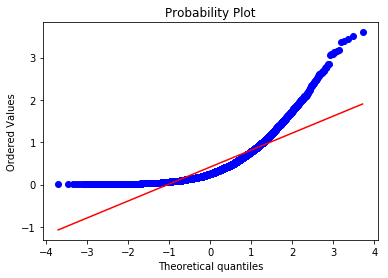

In [916]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y = np.log1p(df2["Global_Sales"])

#Check the new distribution 
sns.distplot(y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

Although there is still skewness present, it seems much better and we will go with it.

The following is the summary statistic of the transformed y values:

In [917]:
y.describe()

count    6824.000000
mean        0.416832
std         0.454186
min         0.009950
25%         0.104360
50%         0.254642
75%         0.559616
max         3.597860
Name: Global_Sales, dtype: float64

## Selecting Relevant Predictors

After conducting the previous exploratory analsis, we think that most of the features are related to sales. However, some categorical variables contain too many levels to be a good predictor. For example, there are 1289 unique values in the variable 'Developer', and given that we only have around 6800 complete observations, 'Developer' will probably cause the model to overfit. Similarly, the predictor 'Publisher' has 262 levels, so we decided to not include it in our model.

We will drop the 'Name' column as there are too many values as well, although it might be interesting to research on natural language processing and examine how the name might affect sales.

We are going to predict global sales, which is a total of the regional sales, so we will pretend as if we do not know the regional sales as well. 

#### Therefore, We will use the following columns as our predictors:

#### Platform, Year_of_release, Genre, Critic_score, Critic_Count, User_Score, User_Count, and Rating.

From our exploratory data analysis, we do see significant relationships between these variables and sales. And also, from an intuitive perspective, we expect all of them to be significant as well. For example, some popular platforms and genre might have larger sales, and games with high critic and user scores may have larger sales as well.

In [1043]:
categorical_features = ['Platform', 'Genre', 'Rating']
numeric_features = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

### Transforming Categorical Variables: OneHot Encoding

In [1044]:
categorical_data = pd.get_dummies(df2.loc[:,categorical_features])
categorical_data.shape

(6824, 35)

From these 3 categorical variables 'Platform', 'Genre' and 'Rating', we get 35 dummy variables.

### Transforming Numeric Variables: Log Transformation

Before fitting the model, we should check if the variables are highly skewed. Since most models (especially linear regression) works best if the data follows roughly a normal distribution, we should log transform/use box cox to transform the variables if they are highly skewed.

In [1045]:
# Check the skew of all numerical features
skewed_feats = df2.loc[:,numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
User_Count,8.664634
Critic_Count,1.031158
Critic_Score,-0.745406
User_Score,-1.218855


We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+x .

Note that setting λ=0 is equivalent to log1p used above for the target variable.

In [1046]:
from scipy.special import boxcox1p
numeric_data = pd.DataFrame()
numeric_data['User_Count'] = boxcox1p(df2['User_Count'], -0.3)
numeric_data['Critic_Count'] = boxcox1p(df2['Critic_Count'], 0.3)
numeric_data['Critic_Score'] = boxcox1p(df2['Critic_Score'], 2)
numeric_data['User_Score'] = boxcox1p(df2['User_Score'], 3) 
numeric_data.head()

,User_Count,Critic_Count,Critic_Score,User_Score
2,2.868282,8.790732,3444.0,267.785667
3,2.645930,8.790732,3280.0,242.666667
6,2.793532,8.381657,4049.5,285.458333
7,2.559414,6.896146,1740.0,145.992000
8,2.842964,9.123976,3871.5,276.528000


In [1047]:
# Check the skew again
from scipy.stats import skew
skewed_feats = numeric_data.apply(lambda x: skew(x.astype('float64'))).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Critic_Count,0.100210
User_Count,0.054818
Critic_Score,-0.211531
User_Score,-0.268455


From the above table, we see that the transformed values are no longer skewed (skewness is very close to 0), so we expect this to be better for our model.

## Train-Test Split

Now we can put the categorical and numeric variables together and split the data into the training (75%) and test part (25%). We will try different model based on the training data using cross validation, and test its performance on the test set to see how well the model is able to predict on unseen data.

In [1069]:
#Combine the numeric variables and categorical variables
data = pd.concat([numeric_data, categorical_data], axis = 1)
data.shape

(6824, 39)

In [1049]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5118, 39)
(1706, 39)
(5118,)
(1706,)


It splits our data into 75% training (5118 observations) and 25% test (1706 observations).

### Import packages

In [1050]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Define a cross validation strategy

We use a 5-fold cross validation to evaluate our model. 

For each model, we will use cross validation to get a good estimate of our model's performance. In particular, we are going to use the Root-Mean-Squared-Error (RMSE) since we believe it is a good metric for regression models. However, we will also be using R-Squared as well since it's better for interpretation.

In [1051]:
#Use 5-fold CV
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    r2= cross_val_score(model, X_train, y_train, scoring="r2", cv = 5)
    return(rmse.mean(),r2.mean())

We also evaluate our model based on the test set (25% of the original data).

In [1052]:
def test_rmse(model):
    prediction = model.fit(X_train, y_train).predict(X_test)
    print("RMSE on the test set: {:.4f}".format(np.sqrt(np.mean((prediction-y_test)**2))))
    print("R-Squared on the test set: {:.4f}".format(model.score(X_test, y_test)))

## Base Model: Linear Regression

For the base model, we will simply use a linear regression and see how well the model does. It will give us a basic idea of our expectation for how good our model is going to be.

We will use 2 metrics: Root mean squared error and R-Squared.

In [1053]:
linear = LinearRegression()
score1_linear, score2_linear=rmse_cv(linear)
print("Linear Regression\nRMSE_CV: {:.4f} \nR-Squared_CV: {:.4f}\n".format(score1_linear, score2_linear))
test_rmse(linear)

Linear Regression
RMSE_CV: 0.3317 
R-Squared_CV: 0.4501

RMSE on the test set: 0.3501
R-Squared on the test set: 0.4439


The baseline linear regression gets a cross-validation RMSE of 0.3317 (we can roughly interpret it as that the average estimate of the log sales is off by 0.33).

Its cross-validation R-Squared is 0.4501, meaning that on average, our model explains 45% of the variation in sales. It's actually not too bad, given that we don't have a lot of predictors.

The RMSE on the test set is 0.3501 and the R-Squared on the test set is 0.4439, both of which are worse than but very close to the cross-validation estimate.

Let's try some other models to see if they can improve upon that.

## Let's try some other models:

### Ridge Regression

In [1054]:
ridge = Ridge()
score1_ridge, score2_ridge = rmse_cv(ridge)
print("Ridge Regression\nRMSE_CV: {:.4f} \nR-Squared_CV: {:.4f}\n".format(score1_ridge, score2_ridge))
test_rmse(ridge)

Ridge Regression
RMSE_CV: 0.3317 
R-Squared_CV: 0.4502

RMSE on the test set: 0.3502
R-Squared on the test set: 0.4438


Ridge Regression turns out to be very similar to Linear Regression.

### KNN

We manually pick some parameters just to get a feel of the potential of the model. If it turns out to be good, we will go ahead and tune the hyperparameters later.

In [1055]:
KNN = KNeighborsRegressor(n_neighbors=60)
score1_KNN, score2_KNN = rmse_cv(KNN)
print("KNN\nRMSE_CV: {:.4f} \nR-Squared_CV: {:.4f}\n".format(score1_KNN, score2_KNN))
test_rmse(KNN)

KNN
RMSE_CV: 0.3988 
R-Squared_CV: 0.2058

RMSE on the test set: 0.4097
R-Squared on the test set: 0.2384


The KNN does not do as well as the linear regression. We also manually tried some other values for n_neighbors, but they are no better. So probably KNN is not a good model for our data.

### Decision Tree

For decision tree, we also first manually pick some parameters just to get a feel of the potential of the model. If it turns out to be good, we will go ahead and tune the hyperparameters later.

In [1056]:
DecisionTree = DecisionTreeRegressor(min_samples_split=40, min_samples_leaf=10, random_state=1)
score1_DT, score2_DT = rmse_cv(DecisionTree)
print("Decision Tree\nRMSE_CV: {:.4f} \nR-Squared_CV: {:.4f}\n".format(score1_DT, score2_DT))
test_rmse(DecisionTree)

Decision Tree
RMSE_CV: 0.3335 
R-Squared_CV: 0.4438

RMSE on the test set: 0.3457
R-Squared on the test set: 0.4577


Decision Tree is slightly better than the previous linear models.

### Support Vector Machine

In [1057]:
SVM = SVR(C = 0.1)
score1_SVM, score2_SVM = rmse_cv(SVM)
print("Support Vector Machine\nRMSE_CV: {:.4f} \nR-Squared_CV: {:.4f}\n".format(score1_SVM, score2_SVM))
test_rmse(SVM)

Support Vector Machine
RMSE_CV: 0.4521 
R-Squared_CV: -0.0188

RMSE on the test set: 0.4721
R-Squared on the test set: -0.0113


Support Vector Machine seems to do a terrible job here. The RMSE is large and R-squared is negative. So we will not go ahead with it.

### Random Forest

Since Random Forest has a lot of parameters, we will just use the default for now.

In [1058]:
RF = RandomForestRegressor(random_state=1)
score1_RF, score2_RF=rmse_cv(RF)
print("Random Forest\nRMSE_CV: {:.4f} \nR-Squared_CV: {:.4f}\n".format(score1_RF, score2_RF))
test_rmse(RF)

Random Forest
RMSE_CV: 0.3064 
R-Squared_CV: 0.5283

RMSE on the test set: 0.3266
R-Squared on the test set: 0.5161


Random Forest seems to be the best.

## Summary of the models

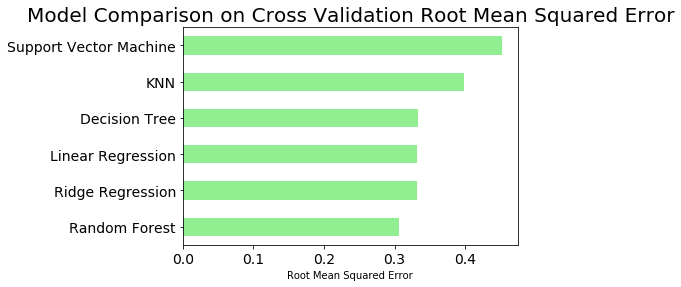

In [1059]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Ridge Regression", "KNN",
                                           "Decision Tree", "Support Vector Machine", "Random Forest"],
                                 "RMSE_CV": [score1_linear, score1_ridge, score1_KNN, score1_DT, 
                                             score1_SVM, score1_RF]})

model_comparison.sort_values("RMSE_CV", ascending=True).plot(x="model", y="RMSE_CV", kind="barh",
                                                            color="lightgreen", legend=False)
plt.ylabel("")
plt.yticks(size=14)
plt.xlabel("Root Mean Squared Error")
plt.xticks(size=14)
plt.title("Model Comparison on Cross Validation Root Mean Squared Error", size=20)
plt.show()

Here we see a comparison of the models based on the cross validation root mean squared error. We note that all of them can be further improved, but they show a potential of the appropriateness and predictive power of the models.

Support Vector Machine is the worst, with the highest Root Mean Squared Error. Linear models' performances are similar to each other. The ensemble models -- random forest is the best.

Therefore, we will go ahead and further improve upon Random Forest.

# Hyperparameter Tuning

We will use randomized grid search for Random Forest model.

In [1060]:
# Number of trees in random forest
n_estimators = [5,10,15,20]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [100,150,250,None]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [1061]:
RF = RandomForestRegressor(random_state=2)

random_cv = RandomizedSearchCV(estimator=RF,
                               param_distributions=random_grid,
                               cv=3, n_iter=15,
                               scoring="neg_mean_squared_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)
random_cv.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.4s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [5, 10, 15, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [100, 150, 250, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

The best hyperparameter:

In [1062]:
random_cv.best_params_

{'n_estimators': 20, 'max_features': 'auto', 'max_depth': 150}

Printing out 5 best hyperparameters found by randomized search.

In [1063]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
random_results.mean_test_score = np.sqrt(-random_results.mean_test_score)
random_results.head()[["mean_test_score", "param_n_estimators",
                         "param_max_features", "param_max_depth"]]

,mean_test_score,param_n_estimators,param_max_features,param_max_depth
14,0.302087,20,auto,150
1,0.303540,20,sqrt,150
6,0.306811,15,sqrt,None
3,0.308366,10,auto,250
5,0.308366,10,auto,150


Evaluate the Random Forest model with the tuned hyperparameters.

In [1064]:
RF = RandomForestRegressor(**random_cv.best_params_,random_state=2)
score1_RF, score2_RF = rmse_cv(RF)
print("Tuned Random Forest:\nRMSE_CV: {:.4f} \nR-Squared_CV: {:.4f}\n".format(score1_RF, score2_RF))
test_rmse(RF)

Tuned Random Forest:
RMSE_CV: 0.3007 
R-Squared_CV: 0.5467

RMSE on the test set: 0.3165
R-Squared on the test set: 0.5457


This is indeed an improvement from the previous model. So we are satisfied with this model.

The tuned Random Forest gets a cross-validation RMSE of 0.3007 and R-Squared of 54.67%. The performance on the test is similar, with a RMSE of 0.3165 and R-Squared of 54.57%.

# Fit Light GBM on the entire data set

In [1065]:
RF = RandomForestRegressor(**random_cv.best_params_,random_state=1)
RF.fit(data, y)
fitted_values = RF.predict(data)

## Plot $y$ vs $\hat{y}$

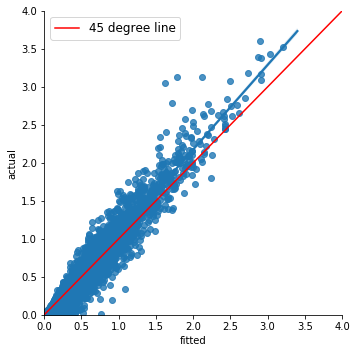

In [1075]:
sns.lmplot(x='fitted', y='actual', data=pd.DataFrame({'fitted':fitted_values, 'actual':y}), aspect=1)
plt.ylim(0, 4)
plt.xlim(0, 4)
plt.plot([0,4],[0,4], color='red', label='45 degree line')
plt.legend(fontsize='large')
plt.show()

From the plot, it seems that the fitted values are consistent with the actual y values without a discernible pattern. So the model is valid.

# Transform y to the Original scale

Since our model is based on the logarithmic scale of the sales, we need to turn the y variables back to the original scale.

We used 'log1p' to calculate the logarithm, so we use 'expm1' to do exponentiation to go back.

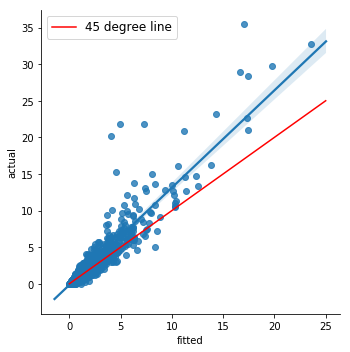

In [1067]:
predictions = np.expm1(fitted_values)
sns.lmplot(x='fitted', y='actual', data=pd.DataFrame({'fitted':predictions, 'actual':df2["Global_Sales"]}), aspect=1)
plt.plot([0,25],[0,25], color='red', label='45 degree line')
plt.legend(fontsize='large')
plt.show()

Examining the actual sales rather than the log scale, we noticed some inconsistencies between the predicted values and the actual values. In particular, it seems that our model underestimated the actual sales when the sales is large. Further investigation may be necessary.

Although there are defficiencies in our model, we are glad to be able to build a predictive model that explains around 55% of the sales number.
